In [5]:
import numpy as np
from ddgclib._particle_liquid_bridge_20240422 import *

#---------------------------------------------------------------------------------------------------------------------
contact_angle = False
theta_p = 10  # Three phase contact angle in °

shearing=True
shearing_parameter= 1

save_activated=True

volume_constraint=False
V_soll = 0.05


refinement= 3 # NOTE: 2 is the minimum refinement needed for the complex to be manifold
#---------------------------------------------------------------------------------------------------------------------


breaking_condition = 1e-9
tau = 1    # Endtime for calculation
itermax = 10000
itermax_load = 25*1e3 # number of iteration of the loaded complex

'''
from Liam 19939
'''
gamma = 2.45e-3  # N/m, surface tension of di-n-butyl phthalate/liquid paraffin mixture
r_i = 15e-3 # Particle Radian

half_filling_angle = 10 # half filling angle in °
S = 0.1 # dimensionless seperation distance

y_i = np.sin(half_filling_angle * np.pi/180.0) * r_i # calculated radian of the liquid bridge
r_l = y_i
r_u = r_l


h_i = r_i -  (r_i**2 - (y_i)**2)**0.5
length = S * r_i
global_contact_angle = (half_filling_angle + theta_p) * np.pi/180.0


dummy_parameter2 = fun_liquid_bridge_N(r_l, r_u, length, refinement, global_contact_angle,tau, gamma, breaking_condition,itermax,contact_angle = contact_angle, save_activated=save_activated, load_activated=False, itermax_load = itermax_load, volume_constraint=volume_constraint, V_init= y_i**2 *np.pi * length * V_soll, shearing=shearing, shearing_parameter= shearing_parameter)


HC = dummy_parameter2['HC']
iteration_list = dummy_parameter2['iteration_list']
df_list_max = dummy_parameter2['df_list_max']
volume_list = dummy_parameter2['volume_list']
contact_angle_list_bottom = dummy_parameter2['contact_angle_list_bottom']
contact_angle_list_top= dummy_parameter2['contact_angle_list_top']

plot_polyscope(HC)

vlist = []


for v in HC.V:
    if (abs(v.x[0]) <= 1e-8) and (0.5e-3 <= v.x[1] <= 16):
        vlist.append(v.x)


sorted_list = sorted(vlist, key=lambda x: x[-1])

vlist_x = []
vlist_y = []
vlist_z = []

for v in sorted_list:
    vlist_x.append(v[0])
    vlist_y.append(v[1])
    vlist_z.append(v[2])

coordiante_dict = {'vlist_x':vlist_x, 'vlist_y':vlist_y, 'vlist_z':vlist_z}


diameter = r_l * 1e3 * 2

rounded_diameter = round(diameter, 1)
rounded_length = round(length*1e3, 1)

iteration_max = 100*1e3


string_savename     = 'contact_angle' + str(theta_p) + '_d'+ str(rounded_diameter) + 'mm_' + 'l' + str(rounded_length) + 'mm_'  + 'iteration' +str(iteration_max) + '_refinement'+str(refinement)


np.savetxt('y_' + string_savename +'.txt',coordiante_dict['vlist_y'])
np.savetxt('z_' + string_savename + '.txt',coordiante_dict['vlist_z'])
np.savetxt('dfmax_' + string_savename + '.txt',df_list_max)
np.savetxt('contact_angle_list_top_' + string_savename + '.txt',contact_angle_list_top)
np.savetxt('volume_list_' + string_savename + '.txt',volume_list)


Simulation is started!
-------------------------------------
V_current = 2.9671206637086022e-08
number of iteration =0
Iteration elapsed: 0
Time elapsed:0.46 s
Amount of highest displacement: 4.54 mikrometer
V_current = 2.9610565016052303e-08
number of iteration =1
V_current = 2.9905258436068514e-08
number of iteration =2
V_current = 2.969943342370277e-08
number of iteration =3
V_current = 2.982374882070537e-08
number of iteration =4
V_current = 2.988192890013728e-08
number of iteration =5
V_current = 2.996410730449499e-08
number of iteration =6
V_current = 2.99111899556231e-08
number of iteration =7
V_current = 3.01263548901197e-08
number of iteration =8
V_current = 3.0342764300470525e-08
number of iteration =9
V_current = 3.039828204777016e-08
number of iteration =10
V_current = 3.04036471768082e-08
number of iteration =11
V_current = 3.0432540364292444e-08
number of iteration =12
V_current = 3.041319098166821e-08
number of iteration =13
V_current = 3.0393379432103056e-08
number of i

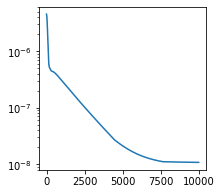

In [7]:
fig3, ax3 = plot.subplots(nrows=1, ncols=1, figsize=(3, 3))

if 1:
    ax3.plot(iteration_list, df_list_max)

    ax3.set_yscale('log')